Try out different kinds of SVM Kernel Functions on non-linearly separable datasets. You may create your own datasets that are non-linearly separable, i.e., can be separated by a non-linear structure, and see which all Kernels can he suitable to classify them.

## import libraries

In [1]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

#non linear dataset

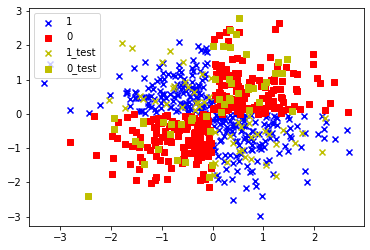

In [3]:
# Create train Dataset
np.random.seed(10)
X = np.random.randn(550, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y = np.where(y, 1, 0)

# Create test Dataset
X_test = np.random.randn(100, 2)
y_test = np.logical_xor(X_test[:, 0] > 0, X_test[:, 1] > 0)
y_test = np.where(y_test, 1, 0)

plt.scatter(X[y == 1, 0],
            X[y == 1, 1],
            c='b', marker='x')
plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            c='r', marker='s')
plt.scatter(X_test[y_test == 1, 0],
            X_test[y_test == 1, 1],
            c='y', marker='x')
plt.scatter(X_test[y_test == 0, 0],
            X_test[y_test == 0, 1],
            c='y', marker='s')

plt.legend([1,0,'1_test','0_test'])
plt.show()

#svm

kernel: rbf (default), poly or sigmoid, your own kernel.


C: this is the regularization parameter described in the Tuning Parameters section


gamma: this was also described in the Tuning Parameters section


degree: it is used only if the chosen kernel is poly and sets the degree of the polinomial


##linear

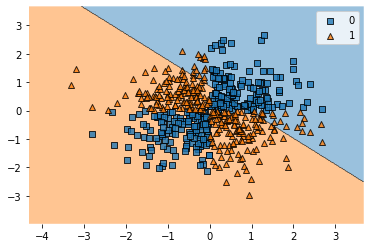

accuracy on train set 62.36 %
accuracy on test set 67.0 %


In [4]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='linear', C=1000, random_state=10)
svm.fit(X, y)

plot_decision_regions(X, y, clf=svm)
plt.legend()
plt.show()

print('accuracy on train set', np.round(svm.score(X,y)*100,2), '%')
print('accuracy on test set', np.round(svm.score(X_test,y_test)*100,2), '%')

##sigmoid

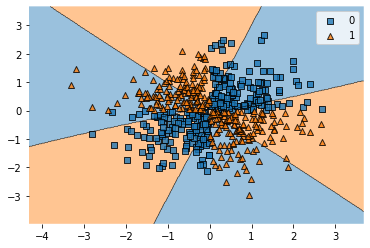

accuracy on train set 51.82 %
accuracy on test set 55.0 %


In [5]:
# Create a SVC classifier using an sigmoid kernel
svm = SVC(kernel='sigmoid', random_state=10)
svm.fit(X, y)

plot_decision_regions(X, y, clf=svm)
plt.legend()
plt.show()

print('accuracy on train set', np.round(svm.score(X,y)*100,2), '%')
print('accuracy on test set', np.round(svm.score(X_test,y_test)*100,2), '%')

##polynomial

deg 1
accuracy on train set 62.36 %
accuracy on test set 66.0 %


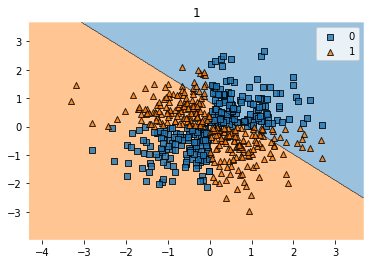

deg 2
accuracy on train set 98.73 %
accuracy on test set 99.0 %


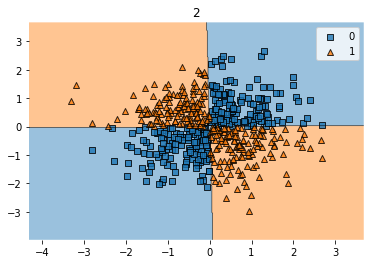

deg 3
accuracy on train set 52.91 %
accuracy on test set 51.0 %


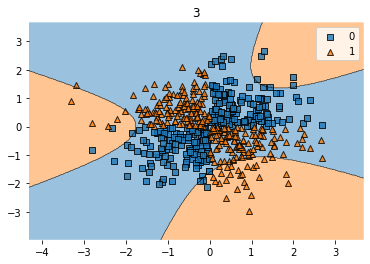

deg 4
accuracy on train set 89.27 %
accuracy on test set 88.0 %


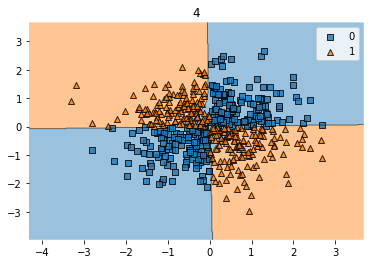

deg 5
accuracy on train set 52.73 %
accuracy on test set 52.0 %


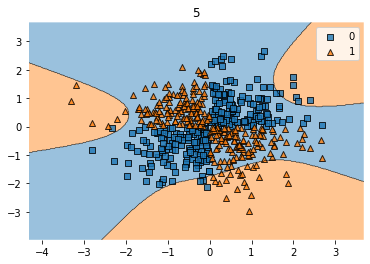

deg 6
accuracy on train set 83.82 %
accuracy on test set 83.0 %


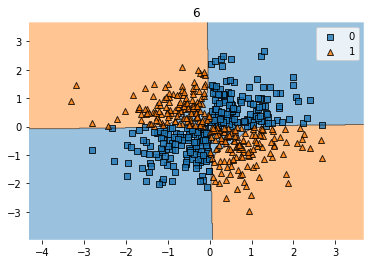

deg 7
accuracy on train set 51.27 %
accuracy on test set 46.0 %


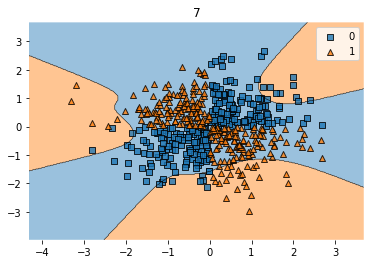

In [6]:
# Create a SVC classifier using an polynomial kernel

for i in range(7):
  svm = SVC(kernel='poly', random_state=10, degree=i+1)
  svm.fit(X, y)

  plt.title(i+1)
  plot_decision_regions(X, y, clf=svm)
  plt.legend()
  print('deg',i+1)
  print('accuracy on train set', np.round(svm.score(X,y)*100,2), '%')
  print('accuracy on test set', np.round(svm.score(X_test,y_test)*100,2), '%')
  plt.show()

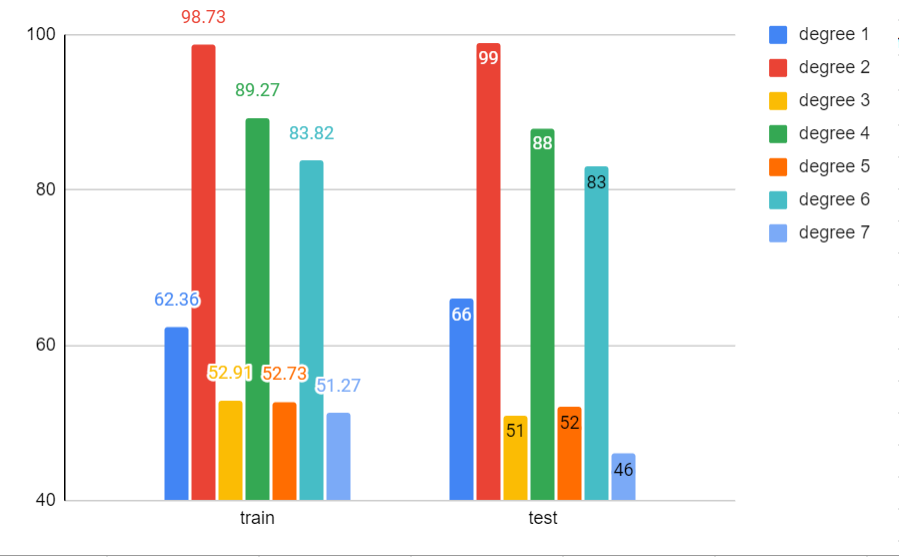

poly-deg 2

accuracy on train set 98.73 %

accuracy on test set 99.0 %

##rbf kernel


gamma= 0.01 C=1
accuracy on train set 50.18 %
accuracy on test set 51.0 %


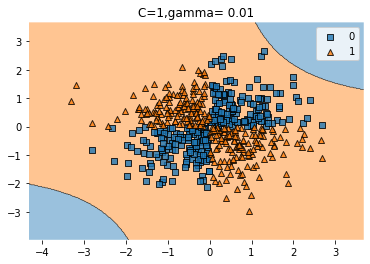

gamma= 1 C=1
accuracy on train set 97.82 %
accuracy on test set 95.0 %


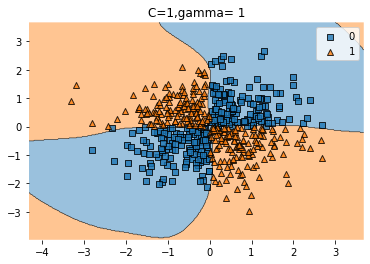

gamma= 10 C=1
accuracy on train set 99.09 %
accuracy on test set 97.0 %


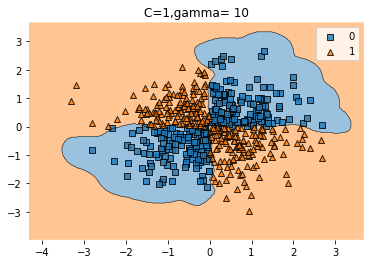

gamma= 100 C=1
accuracy on train set 99.82 %
accuracy on test set 96.0 %


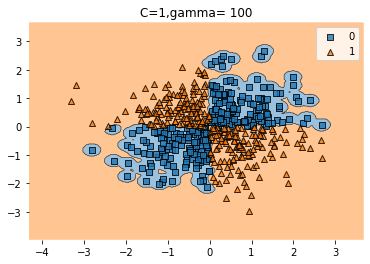

gamma= 1000 C=1
accuracy on train set 100.0 %
accuracy on test set 73.0 %


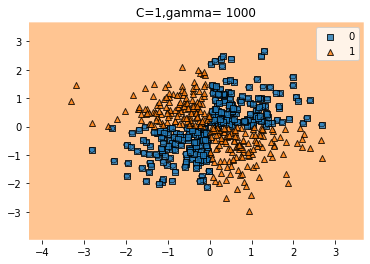

In [7]:
# Create a SVC classifier using an rbf kernel
# changing gamma

for i in [1/100,1,10,100,1000]:
  svm = SVC(kernel='rbf', random_state=10, gamma=i, C=1)
  svm.fit(X, y)

  plt.title('C=1,gamma= {}'.format(i))
  plot_decision_regions(X, y, clf=svm)
  plt.legend()
  print('gamma=',i, 'C=1')
  print('accuracy on train set', np.round(svm.score(X,y)*100,2), '%')
  print('accuracy on test set', np.round(svm.score(X_test,y_test)*100,2), '%')
  plt.show()

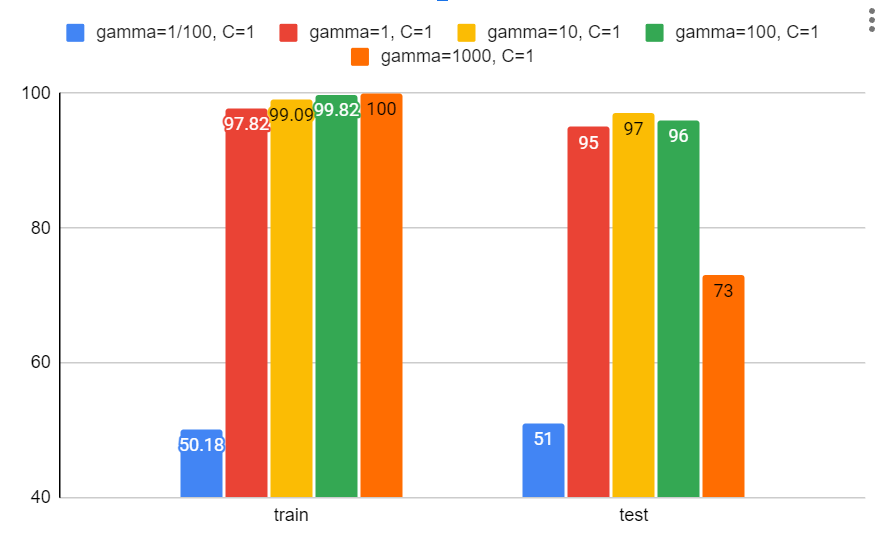

gamma=10 C= 0.01
accuracy on train set 50.18 %
accuracy on test set 51.0 %


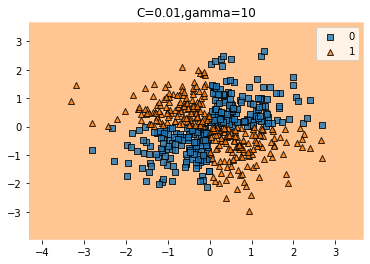

gamma=10 C= 1
accuracy on train set 99.09 %
accuracy on test set 97.0 %


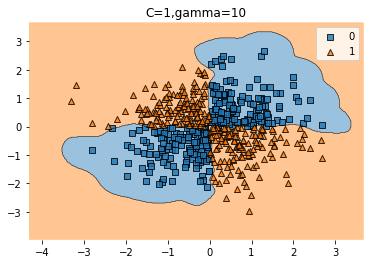

gamma=10 C= 10
accuracy on train set 99.45 %
accuracy on test set 96.0 %


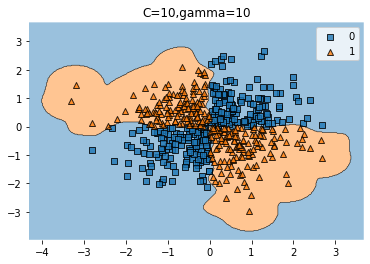

gamma=10 C= 100
accuracy on train set 100.0 %
accuracy on test set 96.0 %


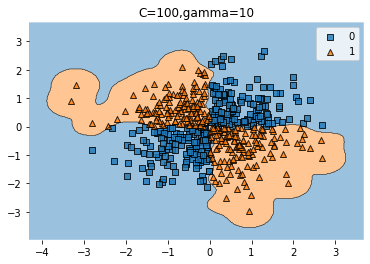

In [8]:
# Create a SVC classifier using an rbf kernel
# changing C

for i in [1/100,1,10,100]:
  svm = SVC(kernel='rbf', random_state=10, gamma=10, C=i)
  svm.fit(X, y)

  plt.title('C={},gamma=10'.format(i))
  plot_decision_regions(X, y, clf=svm)
  plt.legend()
  print('gamma=10', 'C=',i)
  print('accuracy on train set', np.round(svm.score(X,y)*100,2), '%')
  print('accuracy on test set', np.round(svm.score(X_test,y_test)*100,2), '%')
  plt.show()

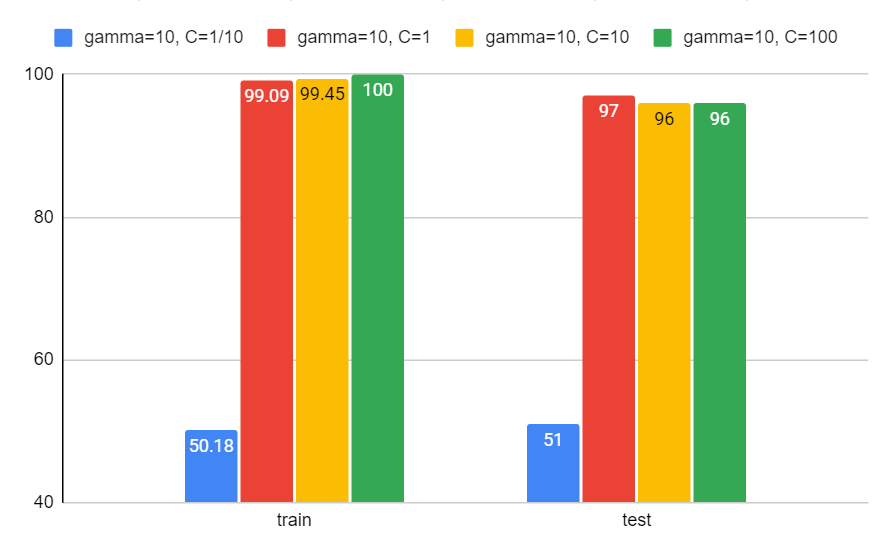

rbf kernel-gamma=10, C=1

accuracy on train set 99.09 %

accuracy on test set 97.0 %

# summary

link to tabulated results and graphs

https://docs.google.com/spreadsheets/d/1FouA17WZe1dyi7TTi-dSFHSZ2rw7y52jRmwei44A8PA/edit#gid=0

After experimenting on all the various types of kernel and tunning their hyper parameters its observed that a polynomial kernel of degree 2 serves as a best fit which provides great performance on train as well as test dataset. It fits generlistically with low bias in contrast to the next best performing kernel of rbf with gamma=100, C=1, which slightly overfits the train dataset but serves well on test set.

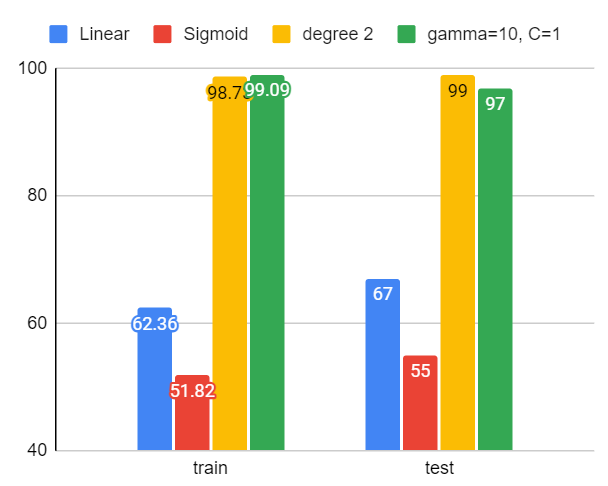

1. poly-deg 2

accuracy on train set 98.73 %

accuracy on test set 99.0 %

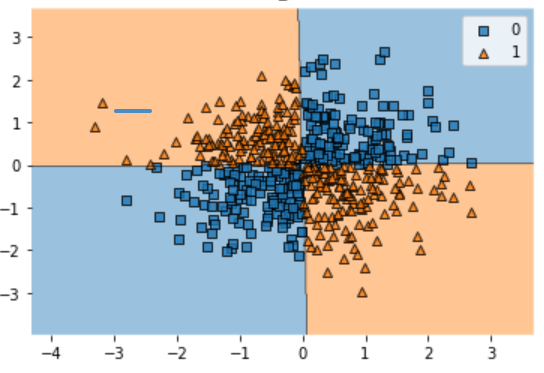

2. rbf kernel-gamma=10, C=1

accuracy on train set 99.09 %

accuracy on test set 97.0 %

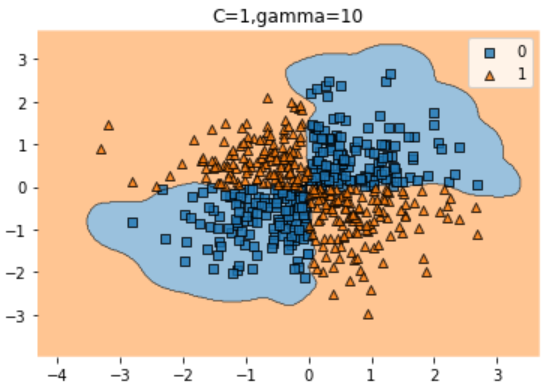